In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [76]:
df = pd.read_csv('data/df2-final.csv', encoding='latin1')
df.drop(['Unnamed: 0','SALIDA','LLEGADA','DIA DE SEMANA'],axis=1, inplace=True)

df['TIPO'].fillna('OTROS', inplace=True)

df['LUGAR'].replace('-','OTROS',inplace=True)
df['LUGAR'].replace('ENDA','OTROS',inplace=True)
df['LUGAR'].fillna('OTROS', inplace=True)

df['CAUSA'].fillna('OTROS', inplace=True)

df['COLONIA'].fillna('SIN COLONIA', inplace=True)

df['ESTACION'].fillna(0, inplace=True)

df.head(2)

,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,MES
0,INCENDIO DE ZACATE Y BASURA,COMERCIO,2016-01-01 00:00:00,FUEGO DIRECTO,SIN COLONIA,2.0,9.0,1
1,INCENDIO DE ZACATE Y BASURA,CASA,2016-01-01 00:00:00,FUEGO DIRECTO,LOMAS DE MADRID,1.0,10.0,1


In [77]:
df_1 = df[(df['TIEMPO TRANSCURRIDO']>0) & (df['TIEMPO TRANSCURRIDO']<120)].copy()
df_1.head(2)

,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,MES
0,INCENDIO DE ZACATE Y BASURA,COMERCIO,2016-01-01 00:00:00,FUEGO DIRECTO,SIN COLONIA,2.0,9.0,1
1,INCENDIO DE ZACATE Y BASURA,CASA,2016-01-01 00:00:00,FUEGO DIRECTO,LOMAS DE MADRID,1.0,10.0,1


In [78]:
df_1['FECHA'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp())
df_2 = df_1.copy()
df_2['FECHA'] = df_1['FECHA'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").timestamp()).copy()
df_2.head(2)

,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,TIEMPO TRANSCURRIDO,MES
0,INCENDIO DE ZACATE Y BASURA,COMERCIO,1.451632e+09,FUEGO DIRECTO,SIN COLONIA,2.0,9.0,1
1,INCENDIO DE ZACATE Y BASURA,CASA,1.451632e+09,FUEGO DIRECTO,LOMAS DE MADRID,1.0,10.0,1


In [79]:
df_2['TIPO_C'] = pd.factorize(df_2['TIPO'], sort=True)[0] + 1
df_2['LUGAR_C'] = pd.factorize(df_2['LUGAR'], sort=True)[0] + 1
df_2['CAUSA_C'] = pd.factorize(df_2['CAUSA'], sort=True)[0] + 1
df_2['COLONIA_C'] = pd.factorize(df_2['COLONIA'], sort=True)[0] + 1

df_3 = df_2.copy()
df_3.drop(['TIPO','LUGAR','CAUSA','COLONIA'],axis=1, inplace=True)
df_3.head(2)

,FECHA,ESTACION,TIEMPO TRANSCURRIDO,MES,TIPO_C,LUGAR_C,CAUSA_C,COLONIA_C
0,1.451632e+09,2.0,9.0,1,18,5,23,576
1,1.451632e+09,1.0,10.0,1,18,4,23,326


In [80]:
x = df_3.drop('TIPO_C', axis=1)
y = df_3['TIPO_C']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 100)

In [81]:
rfc = RandomForestClassifier(n_estimators=600)

In [82]:
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.7571003516364619

In [83]:
pre = rfc.predict(x_test)
cm = confusion_matrix(y_test, pre)

In [92]:
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           1       0.48      0.53      0.50        98
           2       0.35      0.37      0.36       150
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        12
           5       0.34      0.34      0.34        47
           6       0.00      0.00      0.00         0
           7       0.89      0.98      0.93       614
           8       1.00      0.20      0.33        10
           9       0.65      0.66      0.66       218
          10       0.75      0.80      0.78       250
          11       1.00      0.33      0.50         3
          12       0.32      0.13      0.19        69
          13       0.51      0.47      0.49       285
          14       0.34      0.33      0.34        33
          15       0.00      0.00      0.00         6
          16       1.00      0.05      0.09        21
          17       0.73      0.83      0.78       155
          18       0.86    

[Text(114.0, 0.5, 'Truth'), Text(0.5, 69.0, 'Predicted')]

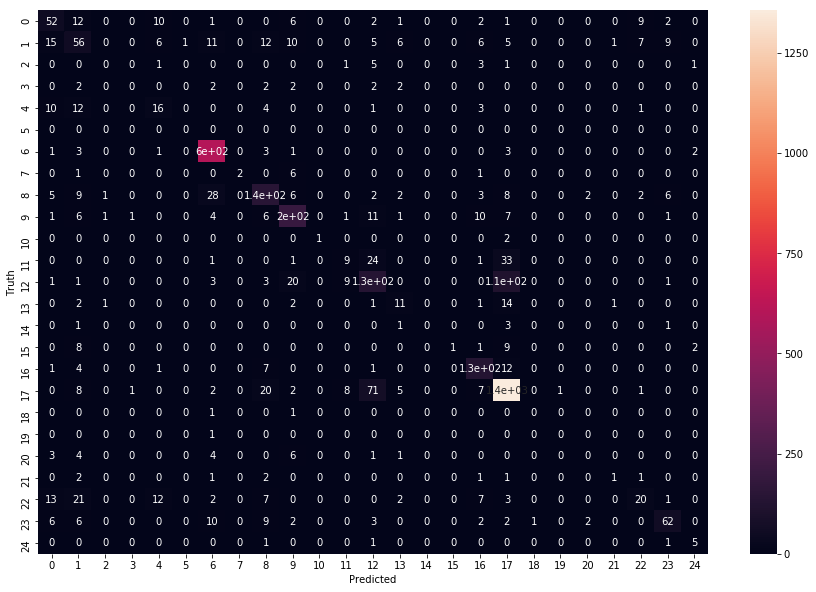

In [89]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(cm, annot=True)
ax.set(xlabel='Predicted', ylabel='Truth')